In [1]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["taxi_trip_fare.csv"]))
data.head()

Saving taxi_trip_fare.csv to taxi_trip_fare.csv


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
from sklearn.preprocessing import StandardScaler

# Check and handle missing values
# Example: Fill missing values with the median
data.fillna(data.median(), inplace=True)

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Convert the scaled features to a DataFrame for better readability
scaled_features_df = pd.DataFrame(scaled_features, columns=data.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

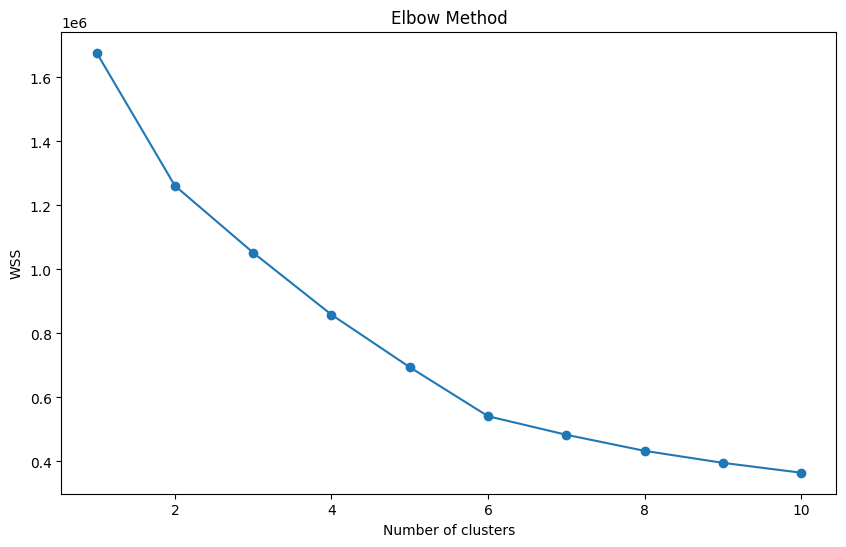

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow Method to find the optimal number of clusters
wss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features_df)
    wss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


In [6]:
# Apply KMeans with the chosen number of clusters
chosen_clusters = 4  # Replace with the number of clusters you determined
kmeans = KMeans(n_clusters=chosen_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_features_df)

# Adding cluster labels to the original data for interpretation
data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()

# Displaying the mean values of each feature for each cluster
print(cluster_analysis)


         trip_duration  distance_traveled  num_of_passengers        fare  \
Cluster                                                                    
0           731.334252           3.504562           1.286653   78.949833   
1          1261.392169           7.504150           1.306576  143.390562   
2         78820.489130           6.652188           1.244565  159.125340   
3          1734.000000       57283.910000           1.000000  187.125000   

               tip  miscellaneous_fees  total_fare  surge_applied  
Cluster                                                            
0         8.214802            8.150634   95.315269       0.000000  
1        23.404739           30.147280  196.942581       0.883435  
2        10.851902           15.376495  185.353736       0.275815  
3        20.000000           50.875000  258.000000       0.000000  


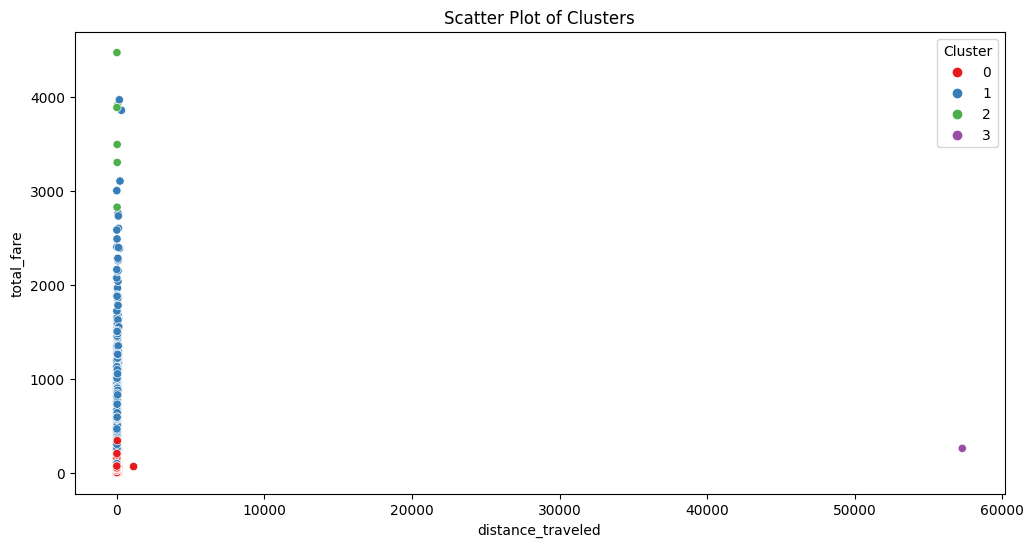

In [9]:
# Visualization of clusters (if the dataset is not high-dimensional)
# If the dataset is high-dimensional, consider using PCA for dimensionality reduction first
import seaborn as sns

# Selecting a couple of features for visualization: 'Feature1' and 'Feature2'
# Replace 'Feature1' and 'Feature2' with actual column names from your dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance_traveled', y='total_fare', hue='Cluster', data=data, palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('distance_traveled')
plt.ylabel('total_fare')
plt.legend(title='Cluster')
plt.show()


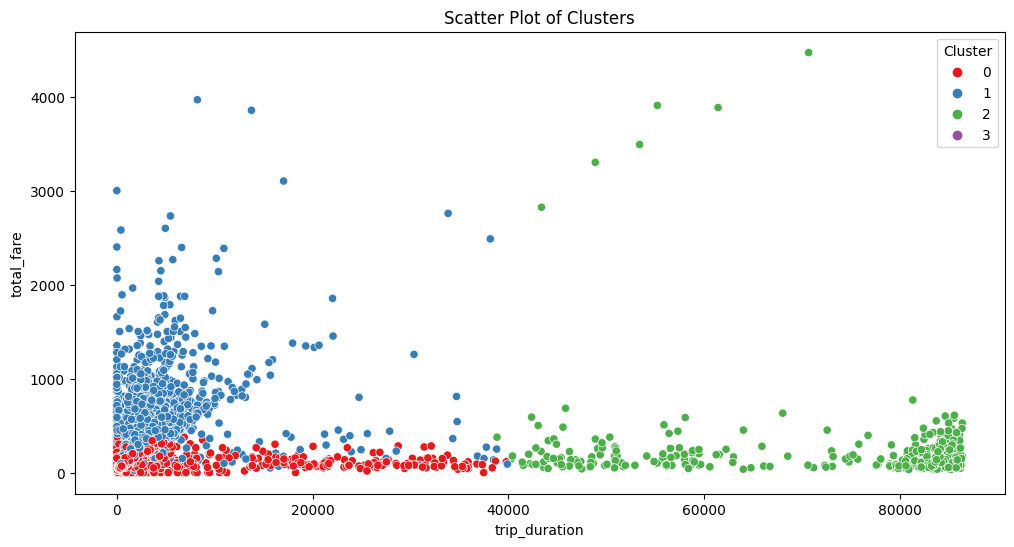

In [10]:
# Visualization of clusters (if the dataset is not high-dimensional)
# If the dataset is high-dimensional, consider using PCA for dimensionality reduction first
import seaborn as sns

# Selecting a couple of features for visualization: 'Feature1' and 'Feature2'
# Replace 'Feature1' and 'Feature2' with actual column names from your dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='total_fare', hue='Cluster', data=data, palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('trip_duration')
plt.ylabel('total_fare')
plt.legend(title='Cluster')
plt.show()


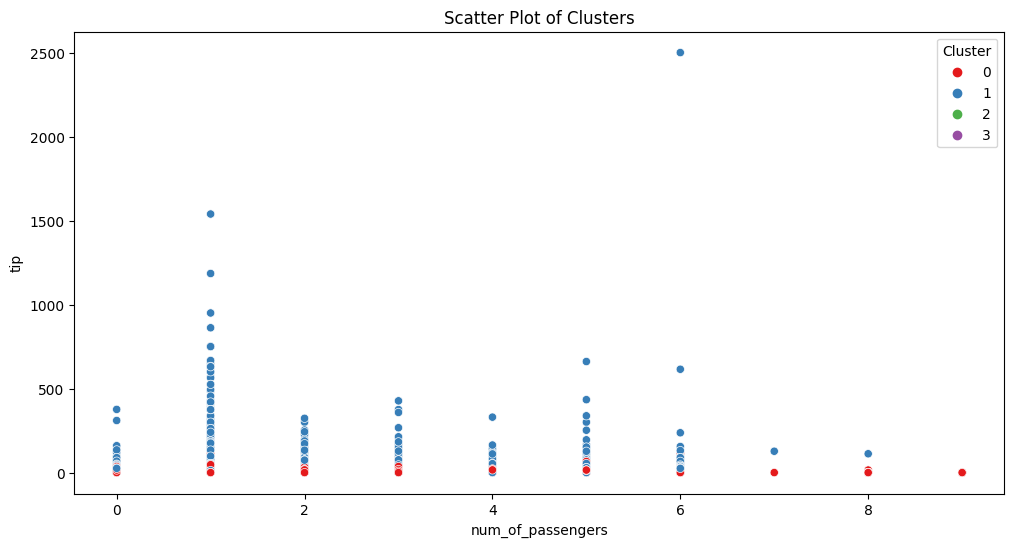

In [12]:
# Visualization of clusters (if the dataset is not high-dimensional)
# If the dataset is high-dimensional, consider using PCA for dimensionality reduction first
import seaborn as sns

# Selecting a couple of features for visualization: 'Feature1' and 'Feature2'
# Replace 'Feature1' and 'Feature2' with actual column names from your dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_of_passengers', y='tip', hue='Cluster', data=data, palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('num_of_passengers')
plt.ylabel('tip')
plt.legend(title='Cluster')
plt.show()

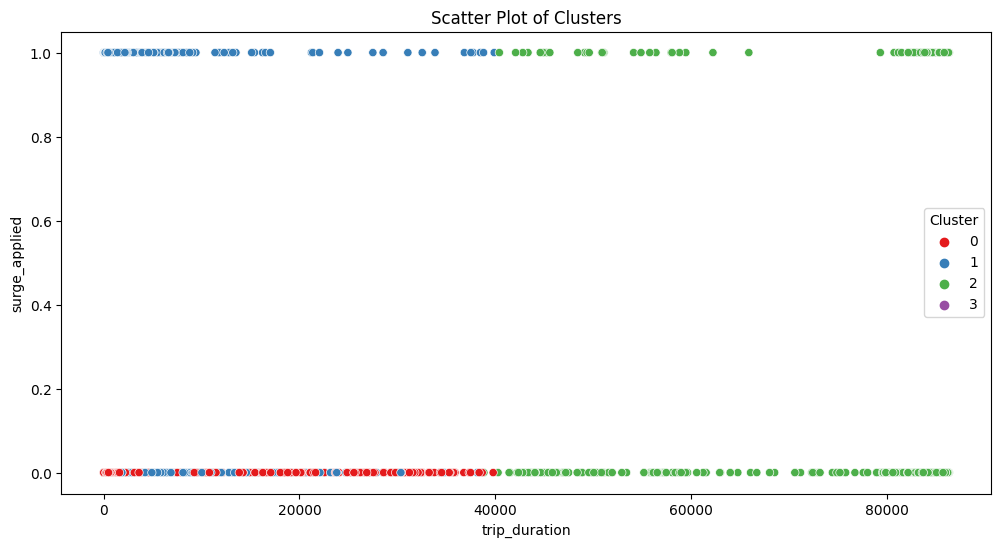

In [13]:
# Visualization of clusters (if the dataset is not high-dimensional)
# If the dataset is high-dimensional, consider using PCA for dimensionality reduction first
import seaborn as sns

# Selecting a couple of features for visualization: 'Feature1' and 'Feature2'
# Replace 'Feature1' and 'Feature2' with actual column names from your dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='surge_applied', hue='Cluster', data=data, palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('trip_duration')
plt.ylabel('surge_applied')
plt.legend(title='Cluster')
plt.show()

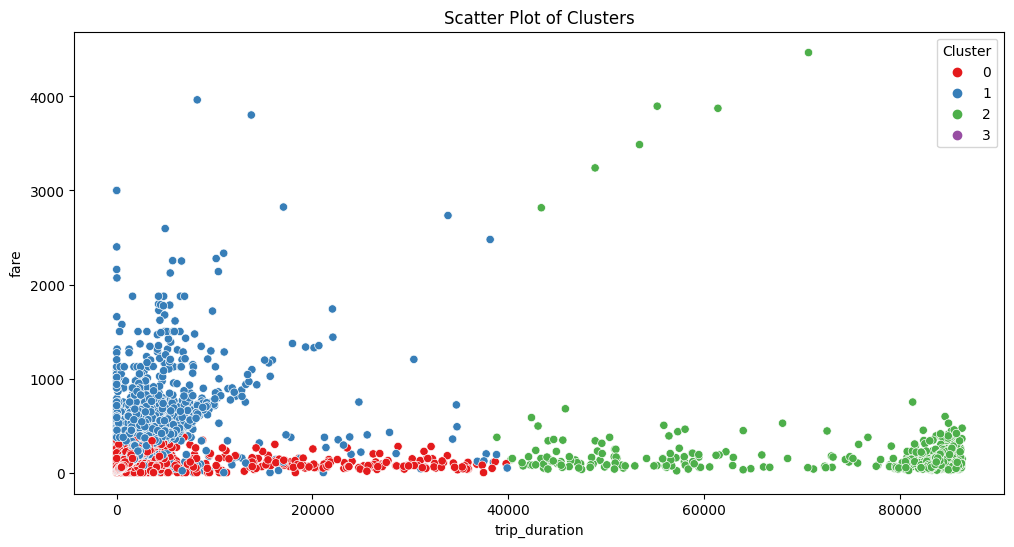

In [11]:
# Visualization of clusters (if the dataset is not high-dimensional)
# If the dataset is high-dimensional, consider using PCA for dimensionality reduction first
import seaborn as sns

# Selecting a couple of features for visualization: 'Feature1' and 'Feature2'
# Replace 'Feature1' and 'Feature2' with actual column names from your dataset
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='fare', hue='Cluster', data=data, palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('trip_duration')
plt.ylabel('fare')
plt.legend(title='Cluster')
plt.show()